# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Import Data

In [30]:
df = pd.read_csv('./data/NYC_Restaurant_Inspections_Data_Cleaned.csv')

In [31]:
df.shape

(120764, 105)

In [32]:
df.head()

,Unnamed: 0,CAMIS,DBA,BORO,ZIPCODE,CUISINE DESCRIPTION,INSPECTION MONTH,INSPECTION YEAR,FLAG__Critical,FLAG__Not Critical,...,VIOLATION__20E,VIOLATION__20F,VIOLATION__22A,VIOLATION__22B,VIOLATION__22C,VIOLATION__22E,VIOLATION__None,VIOLATION__Other,SCORE,GRADE
0,0,30075445,MORRIS PARK BAKE SHOP,BRONX,10462.0,Bakery,2,2016,1,1,...,0,0,0,0,0,0,0,0,10.0,1
1,1,30075445,MORRIS PARK BAKE SHOP,BRONX,10462.0,Bakery,5,2017,1,1,...,0,0,0,0,0,0,0,0,7.0,1
2,2,30075445,MORRIS PARK BAKE SHOP,BRONX,10462.0,Bakery,5,2018,0,2,...,0,0,0,0,0,0,0,0,5.0,1
3,3,30112340,WENDY'S,BROOKLYN,11225.0,Hamburgers,3,2018,1,2,...,0,0,0,0,0,0,0,0,12.0,1
4,4,30112340,WENDY'S,BROOKLYN,11225.0,Hamburgers,3,2019,1,2,...,0,0,0,0,0,0,0,0,13.0,1


In [33]:
# look at number of citations with null values for Score
df[df.SCORE.isnull()==True].shape

(2224, 105)

In [34]:
# drop them
data = df[df.SCORE.isnull() == False].copy()

In [35]:
# check shape - dropped 2224 observations
data.shape

(118540, 105)

# Exploratory Data Analysis

### Correlation Evaluation

In [36]:
# only looking at the pairs that have correlations above 0.5 or less than -0.5
data.corr()[(data.corr()>0.5) | (data.corr()<-0.5)]

,Unnamed: 0,CAMIS,ZIPCODE,INSPECTION MONTH,INSPECTION YEAR,FLAG__Critical,FLAG__Not Critical,VIOLATION__02A,VIOLATION__02B,VIOLATION__02C,...,VIOLATION__20E,VIOLATION__20F,VIOLATION__22A,VIOLATION__22B,VIOLATION__22C,VIOLATION__22E,VIOLATION__None,VIOLATION__Other,SCORE,GRADE
Unnamed: 0,1.000000,0.887583,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CAMIS,0.887583,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ZIPCODE,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
INSPECTION MONTH,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
INSPECTION YEAR,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FLAG__Critical,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.799106,-0.538281
FLAG__Not Critical,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
VIOLATION__02A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
VIOLATION__02B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
VIOLATION__02C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
# only looking at the pairs that have correlations above 0.5 or less than -0.5 for the rest of the features which are not shown in the above matrix
data.corr()['VIOLATION__04G':'VIOLATION__15I'][(data.corr()>0.5) | (data.corr()<-0.5)]

,Unnamed: 0,CAMIS,ZIPCODE,INSPECTION MONTH,INSPECTION YEAR,FLAG__Critical,FLAG__Not Critical,VIOLATION__02A,VIOLATION__02B,VIOLATION__02C,...,VIOLATION__20E,VIOLATION__20F,VIOLATION__22A,VIOLATION__22B,VIOLATION__22C,VIOLATION__22E,VIOLATION__None,VIOLATION__Other,SCORE,GRADE
VIOLATION__04G,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
VIOLATION__04H,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
VIOLATION__04I,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
VIOLATION__04J,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
VIOLATION__04K,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
VIOLATION__04L,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
VIOLATION__04M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
VIOLATION__04N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
VIOLATION__04O,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
VIOLATION__05A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
# only looking at the pairs that have correlations above 0.5 or less than -0.5 for the rest of the features which are not shown in the above matrix
data.corr().loc['VIOLATION__04G':'VIOLATION__15I', 'VIOLATION__04G':'VIOLATION__15I'][(data.corr()>0.5) | (data.corr()<-0.5)]

,VIOLATION__04G,VIOLATION__04H,VIOLATION__04I,VIOLATION__04J,VIOLATION__04K,VIOLATION__04L,VIOLATION__04M,VIOLATION__04N,VIOLATION__04O,VIOLATION__05A,...,VIOLATION__10B,VIOLATION__10C,VIOLATION__10D,VIOLATION__10E,VIOLATION__10F,VIOLATION__10G,VIOLATION__10H,VIOLATION__10I,VIOLATION__10J,VIOLATION__15I
VIOLATION__04G,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
VIOLATION__04H,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
VIOLATION__04I,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
VIOLATION__04J,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
VIOLATION__04K,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
VIOLATION__04L,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
VIOLATION__04M,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
VIOLATION__04N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
VIOLATION__04O,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
VIOLATION__05A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
# only looking at the pairs that have correlations above 0.5 or less than -0.5 for the rest of the features which are not shown in the above matrix
data.corr().loc['VIOLATION__04G':'VIOLATION__15I', 'VIOLATION__05A':'VIOLATION__10B'][(data.corr()>0.5) | (data.corr()<-0.5)]

,VIOLATION__05A,VIOLATION__05B,VIOLATION__05C,VIOLATION__05D,VIOLATION__05E,VIOLATION__05F,VIOLATION__05H,VIOLATION__06A,VIOLATION__06B,VIOLATION__06C,...,VIOLATION__06I,VIOLATION__07A,VIOLATION__08A,VIOLATION__08B,VIOLATION__08C,VIOLATION__09A,VIOLATION__09B,VIOLATION__09C,VIOLATION__10A,VIOLATION__10B
VIOLATION__04G,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
VIOLATION__04H,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
VIOLATION__04I,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
VIOLATION__04J,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
VIOLATION__04K,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
VIOLATION__04L,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.651625,NaN,NaN,NaN,NaN,NaN,NaN,NaN
VIOLATION__04M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
VIOLATION__04N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
VIOLATION__04O,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
VIOLATION__05A,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
# only looking at the pairs that have correlations above 0.5 or less than -0.5 for the rest of the features which are not shown in the above matrix
data.corr().loc['VIOLATION__04G':'VIOLATION__15I', 'VIOLATION__06C':'VIOLATION__06I'][(data.corr()>0.5) | (data.corr()<-0.5)]

,VIOLATION__06C,VIOLATION__06D,VIOLATION__06E,VIOLATION__06F,VIOLATION__06G,VIOLATION__06H,VIOLATION__06I
VIOLATION__04G,NaN,NaN,NaN,NaN,NaN,NaN,NaN
VIOLATION__04H,NaN,NaN,NaN,NaN,NaN,NaN,NaN
VIOLATION__04I,NaN,NaN,NaN,NaN,NaN,NaN,NaN
VIOLATION__04J,NaN,NaN,NaN,NaN,NaN,NaN,NaN
VIOLATION__04K,NaN,NaN,NaN,NaN,NaN,NaN,NaN
VIOLATION__04L,NaN,NaN,NaN,NaN,NaN,NaN,NaN
VIOLATION__04M,NaN,NaN,NaN,NaN,NaN,NaN,NaN
VIOLATION__04N,NaN,NaN,NaN,NaN,NaN,NaN,NaN
VIOLATION__04O,NaN,NaN,NaN,NaN,NaN,NaN,NaN
VIOLATION__05A,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Class Imbalance Evaluation

In [41]:
# view value_counts of Grade column (1 = received an A, 0 = did not receive an A)
data.GRADE.value_counts()

1    70515
0    48025
Name: GRADE, dtype: int64

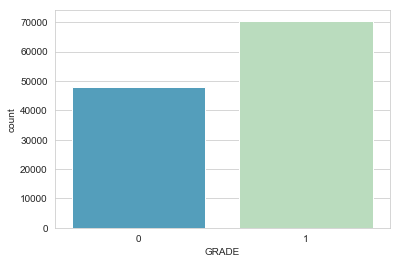

In [42]:
# visualize value counts of target column
sns.set_style('whitegrid')
sns.countplot(x='GRADE',data=data,palette='GnBu_r')

### Outlier Evaluation

In [20]:
data.describe()

,Unnamed: 0,CAMIS,ZIPCODE,INSPECTION MONTH,INSPECTION YEAR,FLAG__Critical,FLAG__Not Critical,VIOLATION__02A,VIOLATION__02B,VIOLATION__02C,...,VIOLATION__20E,VIOLATION__20F,VIOLATION__22A,VIOLATION__22B,VIOLATION__22C,VIOLATION__22E,VIOLATION__None,VIOLATION__Other,SCORE,GRADE
count,120764.000000,1.207640e+05,120764.000000,120764.000000,120764.000000,120764.000000,120764.000000,120764.000000,120764.000000,120764.000000,...,120764.000000,120764.000000,120764.000000,120764.000000,120764.000000,120764.000000,120764.000000,120764.000000,118540.000000,120764.000000
mean,60381.500000,4.569714e+07,10673.335415,6.076496,2017.376851,1.708663,1.350643,0.002285,0.162424,0.003660,...,0.001168,0.019584,0.006384,0.000340,0.013158,0.001019,0.035954,0.022548,14.954397,0.583907
std,34861.708291,4.426433e+06,595.741215,3.431787,1.057177,1.346746,1.060468,0.047752,0.376001,0.060388,...,0.034391,0.141463,0.079647,0.018423,0.114314,0.031898,0.191440,0.164392,10.783543,0.492911
min,0.000000,3.007544e+07,10000.000000,1.000000,2011.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000
25%,30190.750000,4.133936e+07,10022.000000,3.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000
50%,60381.500000,5.000063e+07,10467.000000,6.000000,2018.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,1.000000
75%,90572.250000,5.004610e+07,11228.000000,9.000000,2018.000000,2.000000,2.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,19.000000,1.000000
max,120763.000000,5.009212e+07,12345.000000,12.000000,2019.000000,14.000000,14.000000,1.000000,2.000000,1.000000,...,2.000000,2.000000,1.000000,1.000000,2.000000,1.000000,3.000000,5.000000,166.000000,1.000000


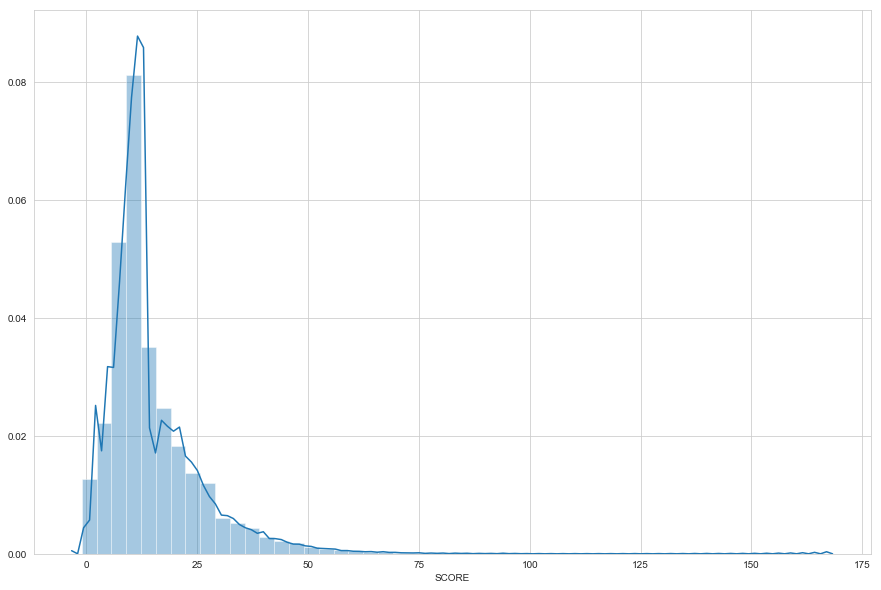

In [24]:
plt.figure(figsize=(15,10))
sns.distplot(data2.SCORE)

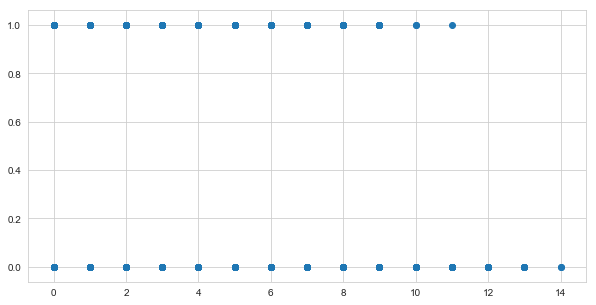

In [25]:
# visualize relationship between number of critical violations vs Grade
plt.figure(figsize=(10,5))
plt.scatter(data2['FLAG__Critical'], data2['GRADE'])

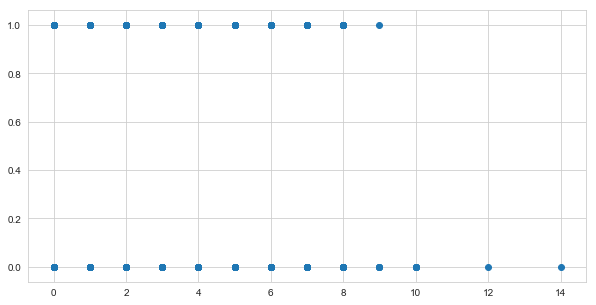

In [26]:
# visualize relationship between number of non-critical violations vs Grade
plt.figure(figsize=(10,5))
plt.scatter(data2['FLAG__Not Critical'], data2['GRADE'])

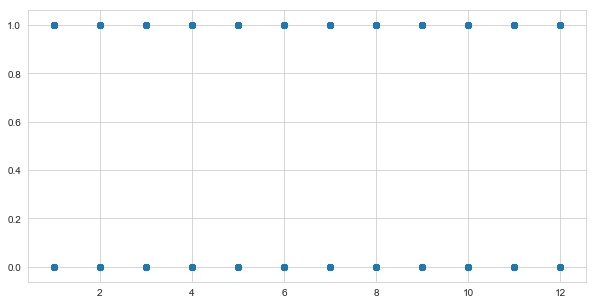

In [27]:
# visualize relationship between Inspection Month vs. Grade
plt.figure(figsize=(10,5))
plt.scatter(data2['INSPECTION MONTH'], data2['GRADE'])

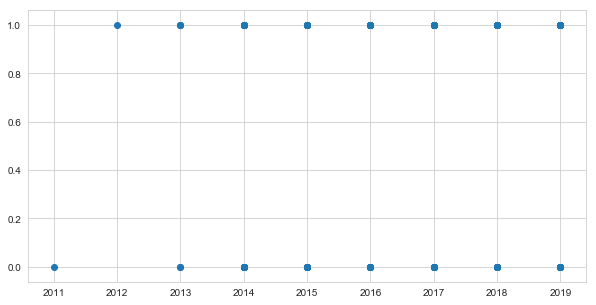

In [28]:
# visualize relationship between Inspection Year vs. Grade
plt.figure(figsize=(10,5))
plt.scatter(data2['INSPECTION YEAR'], data2['GRADE'])

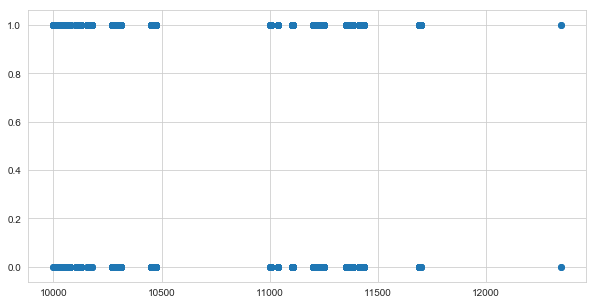

In [29]:
# visualize relationship between Inspection Zip Code vs. Grade
plt.figure(figsize=(10,5))
plt.scatter(data2['ZIPCODE'], data2['GRADE'])